In [122]:
import csv
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

In [185]:
# Q1 (a) 
# get all the data
df_1 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr1.csv")
df_2 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr2.csv")
df_3 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr3.csv")
df_4 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr4.csv")
df_5 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr5.csv")
df_6 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr6.csv")
df_7 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr7.csv")
df_8 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr8.csv")
df_9 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr9.csv")
df_10 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr10.csv")
df_11 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr11.csv")
df_12 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr12.csv")
df_13 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr13.csv")
df_14 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Dalyr14.csv")
df_q1 = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10])
df_q2 = pd.concat([df_q1,df_11,df_12,df_13,df_14])

In [186]:
# combine all tables into one and save it
df_q1 = df_q1.sort_values(['Stkcd', 'Trddt'], ascending = True)
df_q1.to_csv('/Users/a7/Desktop/FIN3080/project1/df_q1.csv',index=False)
df_q2 = df_q2.sort_values(['Stkcd', 'Trddt'], ascending = True)
df_q2.to_csv('/Users/a7/Desktop/FIN3080/project1/df_q2.csv',index=False)

In [3]:
# select the necessary data
df_q1 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/df_q1.csv")
df_q1 = pd.DataFrame(df_q1,columns=["Stkcd","Trddt","Dretwd","Markettype","Dnvaltrd","ChangeRatio"])
df_q1.columns = ["stk","date","ret","mkt","amt","change"]
df_q1

,stk,date,ret,mkt,amt,change
0,1,2010-01-04,-0.027082,4,5.802495e+08,-0.027082
1,1,2010-01-05,-0.017292,4,1.293477e+09,-0.017292
2,1,2010-01-06,-0.017167,4,9.444537e+08,-0.017167
3,1,2010-01-07,-0.010917,4,8.041663e+08,-0.010917
4,1,2010-01-08,-0.002208,4,6.506674e+08,-0.002208
...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2.592687e+07,-0.076923
9020400,873223,2022-09-30,-0.058824,64,1.618768e+07,-0.058824
9020401,873223,2022-10-10,-0.015625,64,9.653453e+06,-0.015625
9020402,873223,2022-10-11,0.039683,64,1.362461e+07,0.039683


In [75]:
# select all A stocks
mkt_index = pd.Series([1,4,16,32,64])
df_q1 = df_q1[df_q1.mkt.isin(mkt_index)]
df_q1

,stk,date,ret,mkt,amt,change,vol_250,vol_125,logret,logcumret,cumret,avg_20,extra
0,1,2010-01-04,-0.027082,4,5.802495e+08,-0.027082,NaN,NaN,-0.027455,NaN,NaN,NaN,NaN
1,1,2010-01-05,-0.017292,4,1.293477e+09,-0.017292,NaN,NaN,-0.017443,NaN,NaN,NaN,NaN
2,1,2010-01-06,-0.017167,4,9.444537e+08,-0.017167,NaN,NaN,-0.017316,NaN,NaN,NaN,NaN
3,1,2010-01-07,-0.010917,4,8.041663e+08,-0.010917,NaN,NaN,-0.010977,NaN,NaN,NaN,NaN
4,1,2010-01-08,-0.002208,4,6.506674e+08,-0.002208,NaN,NaN,-0.002210,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2.592687e+07,-0.076923,0.949560,0.949560,-0.080043,0.319874,0.376955,21163657.80,4763212.20
9020400,873223,2022-09-30,-0.058824,64,1.618768e+07,-0.058824,0.954751,0.954751,-0.060625,0.239832,0.271035,22316953.25,-6129278.25
9020401,873223,2022-10-10,-0.015625,64,9.653453e+06,-0.015625,0.955286,0.955286,-0.015748,0.179207,0.196268,23042396.70,-13388943.70
9020402,873223,2022-10-11,0.039683,64,1.362461e+07,0.039683,0.949978,0.949978,0.038916,0.163458,0.177576,23414463.45,-9789850.45


In [177]:
# check return rate for all the stocks
df_q1['ret'].describe()

count    9.020404e+06
mean     7.265277e-04
std      3.775464e-02
min     -8.957750e-01
25%     -1.444000e-02
50%      0.000000e+00
75%      1.423500e-02
max      1.975362e+01
Name: ret, dtype: float64

In [178]:
# check some outliers
df_jump = df_q1.loc[df_q1['ret']>1]
df_jump = df_jump.sort_values(['ret'], ascending = False)
df_jump
# we have checked for the 3 highest ret, all the stocks turned out to be the first day of listing or reinstatement

,stk,date,ret,mkt,amt,change
2822406,2506,2015-08-12,19.753620,4,2.203469e+09,9.860656
5346486,301025,2021-07-19,19.425810,16,6.739896e+08,19.425810
190087,156,2012-10-19,16.772592,4,4.292413e+08,6.210000
570675,622,2013-02-08,13.196428,4,1.364215e+08,3.732143
567971,620,2011-07-08,11.588034,4,9.731994e+08,3.634361
...,...,...,...,...,...,...
2829704,2509,2010-11-23,1.015849,4,7.113904e+08,1.015849
5321345,300949,2021-02-26,1.009958,16,1.039317e+09,1.009958
5317726,300939,2021-02-01,1.009931,16,1.476276e+09,1.009931
5344653,301019,2021-06-28,1.001728,16,6.467771e+08,1.001728


In [5]:
# annualized volatility of the past 250 days
import math
win = 250
min_periods = 30
df_q1['vol_250'] = df_q1.groupby('stk').ret.apply(lambda x: x.rolling(window=win,min_periods=min_periods).std().shift(1))
df_q1['vol_250'] = df_q1.vol_250*250**0.5
df_q1

,stk,date,ret,mkt,amt,change,vol_250
0,1,2010-01-04,-0.027082,4,5.802495e+08,-0.027082,NaN
1,1,2010-01-05,-0.017292,4,1.293477e+09,-0.017292,NaN
2,1,2010-01-06,-0.017167,4,9.444537e+08,-0.017167,NaN
3,1,2010-01-07,-0.010917,4,8.041663e+08,-0.010917,NaN
4,1,2010-01-08,-0.002208,4,6.506674e+08,-0.002208,NaN
...,...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2.592687e+07,-0.076923,0.949560
9020400,873223,2022-09-30,-0.058824,64,1.618768e+07,-0.058824,0.954751
9020401,873223,2022-10-10,-0.015625,64,9.653453e+06,-0.015625,0.955286
9020402,873223,2022-10-11,0.039683,64,1.362461e+07,0.039683,0.949978


In [6]:
# annualized volatility of the past 125 days
win = 125
min_periods = 30
df_q1['vol_125'] = df_q1.groupby('stk').ret.apply(lambda x: x.rolling(window=win,min_periods=min_periods).std().shift(1))
df_q1['vol_125'] = df_q1.vol_125*250**0.5

In [355]:
df_q1[250:254]

,stk,date,ret,mkt,amt,change,vol_250,vol_125,logret,logcumret,cumret,avg_20,extra
250,1,2011-04-01,0.030473,4,5.300342e+08,0.030473,0.342438,0.284220,0.030018,-0.415776,-0.340172,4.714166e+08,5.861767e+07
251,1,2011-04-06,0.025951,4,1.263488e+09,0.025951,0.342945,0.286482,0.025620,-0.358302,-0.301138,4.562565e+08,8.072317e+08
252,1,2011-04-07,0.011765,4,1.112314e+09,0.011765,0.343633,0.288796,0.011696,-0.315239,-0.270386,4.777303e+08,6.345838e+08
253,1,2011-04-08,-0.001744,4,4.589858e+08,-0.001744,0.343487,0.289225,-0.001746,-0.286227,-0.248908,5.064776e+08,-4.749180e+07


In [112]:
# we found that vol_250 and vol_125 are the same so we check for the last stock
len(df_q1[df_q1.stk==873223])
# since the length < 125, vol_250 and vol_125 both are sd over all the past trading days

84

In [279]:
# Find all the stocks with total trading days < 125 days
df_new = (df_q1.groupby('stk').size()<125)
df_new = pd.DataFrame(df_new,columns=['<125days'])
df_new = df_new[df_new['<125days']==True]
df_new.reset_index(inplace=True)
short = df_new['stk'].unique()
short
# all these stocks will have vol_250 = vol_125

array([  1222,   1226,   1228,   1229,   1230,   1231,   1236,   1238,
         1255,   1258,   1259,   1268,   1269,   1270,   1283,   1309,
         1316,   1318,   1319,   1323,   1330,   1331,   1332,   1336,
         1339, 301095, 301107, 301109, 301112, 301115, 301120, 301121,
       301125, 301132, 301135, 301139, 301148, 301150, 301151, 301152,
       301153, 301156, 301160, 301161, 301162, 301163, 301171, 301175,
       301176, 301183, 301187, 301191, 301192, 301195, 301197, 301205,
       301208, 301209, 301212, 301220, 301227, 301231, 301233, 301234,
       301238, 301239, 301248, 301257, 301259, 301266, 301269, 301270,
       301276, 301278, 301279, 301282, 301283, 301285, 301286, 301288,
       301289, 301296, 301298, 301300, 301302, 301306, 301308, 301309,
       301312, 301313, 301318, 301319, 301321, 301326, 301327, 301328,
       301330, 301331, 301333, 301336, 301338, 301339, 301349, 301363,
       301366, 301369, 430564, 430685, 600591, 600607, 600842, 600849,
      

In [366]:
vol125 = df_q1.groupby('mkt').vol_125.mean()
vol125 = pd.DataFrame(vol125)
vol125.reset_index(inplace=True)
vol250 = df_q1.groupby('mkt').vol_250.mean()
vol250 = pd.DataFrame(vol250)
vol250.reset_index(inplace=True)
vol = pd.merge(vol250,vol125,on='mkt',how='left')
vol

,mkt,vol_250,vol_125
0,1,0.451523,0.436593
1,4,0.476455,0.460933
2,16,0.669142,0.605046
3,64,0.756458,0.641414


In [7]:
# Q1(b) cumulative return over the past trading days
window = 250
min_periods = 30
df_q1['logret'] = df_q1['ret'].apply(lambda x: math.log(1+x) )
df_q1['logcumret'] = df_q1.groupby('stk').logret.apply(lambda x: x.rolling(window=window,min_periods=min_periods).sum().shift(1))
df_q1['cumret'] = df_q1['logcumret'].apply(lambda x: math.exp(x) - 1)
df_q1

,stk,date,ret,mkt,amt,change,vol_250,vol_125,logret,logcumret,cumret
0,1,2010-01-04,-0.027082,4,5.802495e+08,-0.027082,NaN,NaN,-0.027455,NaN,NaN
1,1,2010-01-05,-0.017292,4,1.293477e+09,-0.017292,NaN,NaN,-0.017443,NaN,NaN
2,1,2010-01-06,-0.017167,4,9.444537e+08,-0.017167,NaN,NaN,-0.017316,NaN,NaN
3,1,2010-01-07,-0.010917,4,8.041663e+08,-0.010917,NaN,NaN,-0.010977,NaN,NaN
4,1,2010-01-08,-0.002208,4,6.506674e+08,-0.002208,NaN,NaN,-0.002210,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2.592687e+07,-0.076923,0.949560,0.949560,-0.080043,0.319874,0.376955
9020400,873223,2022-09-30,-0.058824,64,1.618768e+07,-0.058824,0.954751,0.954751,-0.060625,0.239832,0.271035
9020401,873223,2022-10-10,-0.015625,64,9.653453e+06,-0.015625,0.955286,0.955286,-0.015748,0.179207,0.196268
9020402,873223,2022-10-11,0.039683,64,1.362461e+07,0.039683,0.949978,0.949978,0.038916,0.163458,0.177576


In [367]:
df_q1.dropna()

,stk,date,ret,mkt,amt,change,vol_250,vol_125,logret,logcumret,cumret,avg_20,extra
30,1,2010-02-22,-0.015590,4,3.679337e+08,-0.015590,0.414100,0.414100,-0.015713,-0.082063,-0.078786,8.114218e+08,-4.434881e+08
31,1,2010-02-23,-0.024887,4,5.133779e+08,-0.024887,0.408859,0.408859,-0.025202,-0.097775,-0.093147,7.923214e+08,-2.789435e+08
32,1,2010-02-24,0.007425,4,4.975315e+08,0.007425,0.406910,0.406910,0.007398,-0.122977,-0.115716,7.460460e+08,-2.485145e+08
33,1,2010-02-25,0.020267,4,7.708365e+08,0.020267,0.401632,0.401632,0.020064,-0.115580,-0.109150,7.169562e+08,5.388029e+07
34,1,2010-02-26,0.013544,4,1.008966e+09,0.013544,0.400579,0.400579,0.013453,-0.095515,-0.091096,6.852341e+08,3.237324e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2.592687e+07,-0.076923,0.949560,0.949560,-0.080043,0.319874,0.376955,2.116366e+07,4.763212e+06
9020400,873223,2022-09-30,-0.058824,64,1.618768e+07,-0.058824,0.954751,0.954751,-0.060625,0.239832,0.271035,2.231695e+07,-6.129278e+06
9020401,873223,2022-10-10,-0.015625,64,9.653453e+06,-0.015625,0.955286,0.955286,-0.015748,0.179207,0.196268,2.304240e+07,-1.338894e+07
9020402,873223,2022-10-11,0.039683,64,1.362461e+07,0.039683,0.949978,0.949978,0.038916,0.163458,0.177576,2.341446e+07,-9.789850e+06


In [153]:
gzmt = df_q1[df_q1.stk==600519]
gzmt = pd.DataFrame(gzmt,columns=['date','cumret'])
gzmt = gzmt.dropna()
yzmy = df_q1[df_q1.stk==600188]
yzmy = pd.DataFrame(yzmy,columns=['date','cumret'])
yzmy = yzmy.dropna()
stocks = pd.merge(gzmt,yzmy,on='date',how='left')
stocks = stocks.dropna()
stocks.columns = ['date','600519','600188']
stocks

,date,600519,600188
0,2010-02-22,0.019254,-0.102864
1,2010-02-23,-0.004359,-0.108506
2,2010-02-24,-0.018079,-0.133246
3,2010-02-25,-0.011190,-0.124131
5,2010-03-01,-0.017550,-0.108506
...,...,...,...
3061,2022-09-29,0.177762,0.626875
3062,2022-09-30,0.160073,0.538884
3063,2022-10-10,0.122388,0.700413
3064,2022-10-11,0.102120,0.565687


Text(0, 0.5, 'cumret')

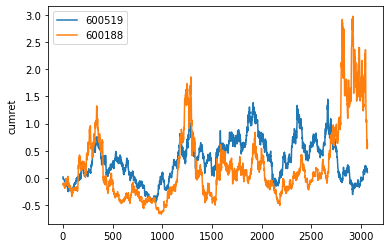

In [154]:
stocks[['600519','600188']].plot()
plt.ylabel('cumret')

In [144]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
p1=stocks.GZMT.cumret.plot(label=u'600519')
plt.ylabel('cumret')
#p2=stocks['600188'].plot(style='--',color='r',)
#plt.yticks(plt.yticks()[0],['$10^%d$'%w for w in range(len(plt.yticks()[0]))])
#x.plot(logy=True,label=u'对数数据图',legend=True,secondary_y=True,style='--',color='r') #这里不能用这个，因为它会同时改变图中的x坐标轴和y坐标轴
#plt.ylabel('指数坐标')
#blue_line = mlines.Line2D([],[],linestyle='-',color='blue',markersize=2, label=u'原始数据图')
#red_line= mlines.Line2D([],[],linestyle='--',color='red',markersize=2, label=u'对数数据图')
#plt.legend(handles=[blue_line,red_line],loc='upper left')
#plt.grid(True)
#plt.show()

AttributeError: 'Series' object has no attribute 'cumret'

<Figure size 432x288 with 0 Axes>

In [8]:
# Q1(c) calculate the average amt over the past 20 trading days
win = 20
df_q1['avg_20'] = df_q1.groupby('stk').amt.apply(lambda x: x.rolling(window=win).mean().shift(1))
df_q1

,stk,date,ret,mkt,amt,change,vol_250,vol_125,logret,logcumret,cumret,avg_20
0,1,2010-01-04,-0.027082,4,5.802495e+08,-0.027082,NaN,NaN,-0.027455,NaN,NaN,NaN
1,1,2010-01-05,-0.017292,4,1.293477e+09,-0.017292,NaN,NaN,-0.017443,NaN,NaN,NaN
2,1,2010-01-06,-0.017167,4,9.444537e+08,-0.017167,NaN,NaN,-0.017316,NaN,NaN,NaN
3,1,2010-01-07,-0.010917,4,8.041663e+08,-0.010917,NaN,NaN,-0.010977,NaN,NaN,NaN
4,1,2010-01-08,-0.002208,4,6.506674e+08,-0.002208,NaN,NaN,-0.002210,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2.592687e+07,-0.076923,0.949560,0.949560,-0.080043,0.319874,0.376955,21163657.80
9020400,873223,2022-09-30,-0.058824,64,1.618768e+07,-0.058824,0.954751,0.954751,-0.060625,0.239832,0.271035,22316953.25
9020401,873223,2022-10-10,-0.015625,64,9.653453e+06,-0.015625,0.955286,0.955286,-0.015748,0.179207,0.196268,23042396.70
9020402,873223,2022-10-11,0.039683,64,1.362461e+07,0.039683,0.949978,0.949978,0.038916,0.163458,0.177576,23414463.45


In [9]:
# calculate the extra amount
df_q1["extra"] = df_q1.amt-df_q1.avg_20
df_q1

,stk,date,ret,mkt,amt,change,vol_250,vol_125,logret,logcumret,cumret,avg_20,extra
0,1,2010-01-04,-0.027082,4,5.802495e+08,-0.027082,NaN,NaN,-0.027455,NaN,NaN,NaN,NaN
1,1,2010-01-05,-0.017292,4,1.293477e+09,-0.017292,NaN,NaN,-0.017443,NaN,NaN,NaN,NaN
2,1,2010-01-06,-0.017167,4,9.444537e+08,-0.017167,NaN,NaN,-0.017316,NaN,NaN,NaN,NaN
3,1,2010-01-07,-0.010917,4,8.041663e+08,-0.010917,NaN,NaN,-0.010977,NaN,NaN,NaN,NaN
4,1,2010-01-08,-0.002208,4,6.506674e+08,-0.002208,NaN,NaN,-0.002210,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2.592687e+07,-0.076923,0.949560,0.949560,-0.080043,0.319874,0.376955,21163657.80,4763212.20
9020400,873223,2022-09-30,-0.058824,64,1.618768e+07,-0.058824,0.954751,0.954751,-0.060625,0.239832,0.271035,22316953.25,-6129278.25
9020401,873223,2022-10-10,-0.015625,64,9.653453e+06,-0.015625,0.955286,0.955286,-0.015748,0.179207,0.196268,23042396.70,-13388943.70
9020402,873223,2022-10-11,0.039683,64,1.362461e+07,0.039683,0.949978,0.949978,0.038916,0.163458,0.177576,23414463.45,-9789850.45


In [19]:
amt_mean = df_q1.groupby('mkt').extra.mean()
amt_mean = pd.DataFrame(amt_mean)
amt_mean.reset_index(inplace=True)
amt_sd = df_q1.groupby('mkt').extra.std()
amt_sd = pd.DataFrame(amt_sd)
amt_sd.reset_index(inplace=True)
amt = pd.merge(amt_mean,amt_sd,on='mkt',how='left')
amt.columns = ['mkt','mean','sd']
amt

,mkt,mean,sd
0,1,-7.795718e+05,2.641444e+08
1,4,-1.207584e+04,1.974449e+08
2,16,-1.043425e+06,1.714771e+08
3,64,-2.965596e+05,1.844676e+07


In [76]:
# Q1(2) get the ipo data
df_ipo = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_Co.csv")
df_ipo = pd.DataFrame(df_ipo,columns=["Listdt","Stkcd","Markettype"])
df_ipo.columns = ["date","stk","mkt"]
df_ipo['is_ipo'] = 1
df_ipo = df_ipo.sort_values(['date', 'stk'], ascending = True)
df_ipo

,date,stk,mkt,is_ipo
58,2010-01-06,2329,4,1
59,2010-01-06,2330,4,1
60,2010-01-06,2331,4,1
1997,2010-01-07,601117,1,1
747,2010-01-08,300037,16,1
...,...,...,...,...
1913,2022-10-13,301316,16,1
2256,2022-10-13,603163,1,1
3356,2022-10-13,837046,64,1
1934,2022-10-14,430476,64,1


In [77]:
df_total = pd.DataFrame(df_q1,columns=["stk","date","ret","mkt"])
df_total["date_60"] = df_total.groupby("stk")["date"].shift(60)
df_total.rename(columns = {"date": "date_60","date_60":"date"}, inplace = True)
df_total

,stk,date_60,ret,mkt,date
0,1,2010-01-04,-0.027082,4,NaN
1,1,2010-01-05,-0.017292,4,NaN
2,1,2010-01-06,-0.017167,4,NaN
3,1,2010-01-07,-0.010917,4,NaN
4,1,2010-01-08,-0.002208,4,NaN
...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2022-07-06
9020400,873223,2022-09-30,-0.058824,64,2022-07-07
9020401,873223,2022-10-10,-0.015625,64,2022-07-08
9020402,873223,2022-10-11,0.039683,64,2022-07-11


In [78]:
df_total = pd.merge(df_total,df_ipo,on=['date','stk','mkt'],how='left')
df_total

,stk,date_60,ret,mkt,date,is_ipo
0,1,2010-01-04,-0.027082,4,NaN,NaN
1,1,2010-01-05,-0.017292,4,NaN,NaN
2,1,2010-01-06,-0.017167,4,NaN,NaN
3,1,2010-01-07,-0.010917,4,NaN,NaN
4,1,2010-01-08,-0.002208,4,NaN,NaN
...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2022-07-06,NaN
9020400,873223,2022-09-30,-0.058824,64,2022-07-07,NaN
9020401,873223,2022-10-10,-0.015625,64,2022-07-08,NaN
9020402,873223,2022-10-11,0.039683,64,2022-07-11,NaN


In [84]:
df_total['ret_1'] = df_total.ret + 1
df_total['cumret_all'] = df_total.groupby('stk').ret_1.cumprod()
df_total['cumret_60'] = df_total.groupby('stk')['cumret_all'].shift(60)
win = 60
df_total['cumret_avg'] = df_total.groupby('stk').cumret_all.apply(lambda x: x.rolling(window=win).mean().shift(1))
df_total['cumret_avg'] = df_total.cumret_avg / df_total.cumret_60
df_total

,stk,date_60,ret,mkt,date,is_ipo,ret_1,cumret_all,cumret_60,cumret_avg
0,1,2010-01-04,-0.027082,4,NaN,NaN,0.972918,0.972918,NaN,NaN
1,1,2010-01-05,-0.017292,4,NaN,NaN,0.982708,0.956094,NaN,NaN
2,1,2010-01-06,-0.017167,4,NaN,NaN,0.982833,0.939681,NaN,NaN
3,1,2010-01-07,-0.010917,4,NaN,NaN,0.989083,0.929423,NaN,NaN
4,1,2010-01-08,-0.002208,4,NaN,NaN,0.997792,0.927370,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9020399,873223,2022-09-29,-0.076923,64,2022-07-06,NaN,0.923077,1.271035,1.227417,1.007022
9020400,873223,2022-09-30,-0.058824,64,2022-07-07,NaN,0.941176,1.196268,1.249224,0.990026
9020401,873223,2022-10-10,-0.015625,64,2022-07-08,NaN,0.984375,1.177576,1.233647,1.001811
9020402,873223,2022-10-11,0.039683,64,2022-07-11,NaN,1.039683,1.224306,1.221186,1.011268


In [85]:
ipo = pd.DataFrame(df_total,columns=["date","stk","mkt","cumret_avg","is_ipo"])
ipo = ipo[ipo.is_ipo==1]
ipo = ipo.sort_values(['date', 'stk'], ascending = True)
ipo

,date,stk,mkt,cumret_avg,is_ipo
2315704,2010-01-06,2329,4,0.925265,1.0
2318639,2010-01-06,2330,4,0.790854,1.0
2321658,2010-01-06,2331,4,0.993927,1.0
7857442,2010-01-07,601117,1,0.895362,1.0
3806985,2010-01-08,300037,16,0.917808,1.0
...,...,...,...,...,...
5369183,2022-07-08,301139,16,0.834565,1.0
5371782,2022-07-08,301175,16,0.923452,1.0
5380718,2022-07-11,301312,16,1.393437,1.0
8444183,2022-07-12,603235,1,0.647562,1.0


In [86]:
time = pd.Series(ipo['date'])
time

2315704    2010-01-06
2318639    2010-01-06
2321658    2010-01-06
7857442    2010-01-07
3806985    2010-01-08
              ...    
5369183    2022-07-08
5371782    2022-07-08
5380718    2022-07-11
8444183    2022-07-12
9004178    2022-07-12
Name: date, Length: 2825, dtype: object

In [87]:
other = pd.DataFrame(df_total,columns=["date","stk","mkt","cumret_avg","is_ipo"])
other = other[other.is_ipo != 1]
other = other[other.date.isin(time)]
other = other.sort_values(['date', 'stk'], ascending = True)
other

,date,stk,mkt,cumret_avg,is_ipo
62,2010-01-06,1,4,0.983492,NaN
3094,2010-01-06,2,4,0.921476,NaN
8894,2010-01-06,5,4,0.954550,NaN
11654,2010-01-06,6,4,1.005602,NaN
14631,2010-01-06,7,4,1.020769,NaN
...,...,...,...,...,...
9019738,2022-07-12,871970,64,0.992179,NaN
9019958,2022-07-12,871981,64,0.926850,NaN
9020193,2022-07-12,872925,64,0.992201,NaN
9020319,2022-07-12,873169,64,1.048682,NaN


In [158]:
# seperate into different tables based on the market type
ipo_sh = ipo[ipo.mkt==1]
ipo_sz = ipo[ipo.mkt==4]
ipo_kc = ipo[ipo.mkt.isin([16,32])]
ipo_bj = ipo[ipo.mkt==64]
other_sh = other[other.mkt==1]
other_sz = other[other.mkt==4]
other_kc = other[other.mkt.isin([16,32])]
other_bj = other[other.mkt==64]

In [159]:
time_sh = ipo_sh.date.unique()
ttest_sh = pd.Series()
for i in time_sh:
    series_ipo = pd.DataFrame(ipo_sh[ipo_sh.date==i]['cumret_avg'])
    series_ipo['x'] = 1
    series_other = pd.DataFrame(other_sh[other_sh.date==i]['cumret_avg'])
    series_other['x'] = 1
    series_other = pd.merge(series_other,series_ipo,on='x',how='left')
    t = stats.ttest_ind(series_other['cumret_avg_x'],series_other['cumret_avg_y']).pvalue
    ttest_sh[str(i)] = t
ttest_sh = pd.DataFrame(ttest_sh)
ttest_sh.reset_index(inplace=True)
ttest_sh.columns = ['date','t']
ttest_sh

/var/folders/lt/n310_nl560b_6_l958v677f40000gn/T/ipykernel_8554/3820416883.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ttest_sh = pd.Series()


,date,t
0,2010-01-07,1.947675e-234
1,2010-01-18,1.075679e-115
2,2010-01-21,0.000000e+00
3,2010-01-28,6.625128e-179
4,2010-02-02,3.888226e-174
...,...,...
722,2022-05-06,0.000000e+00
723,2022-05-12,0.000000e+00
724,2022-05-20,1.901627e-44
725,2022-06-30,0.000000e+00


In [160]:
ipo_sh = pd.merge(ipo_sh,ttest_sh,on='date',how='left')
ipo_sh['t_0.05'] = ipo_sh.apply(lambda x: 1 if(x.t <= 0.05) else 0 , axis = 1)
ipo_sh['t_0.01'] = ipo_sh.apply(lambda x: 1 if(x.t <= 0.01) else 0 , axis = 1)
ipo_sh

,date,stk,mkt,cumret_avg,is_ipo,t,t_0.05,t_0.01
0,2010-01-07,601117,1,0.895362,1.0,1.947675e-234,1,1
1,2010-01-18,601801,1,0.895190,1.0,1.075679e-115,1,1
2,2010-01-21,601877,1,0.833092,1.0,0.000000e+00,1,1
3,2010-01-28,601179,1,0.975567,1.0,6.625128e-179,1,1
4,2010-02-02,601268,1,1.180634,1.0,3.888226e-174,1,1
...,...,...,...,...,...,...,...,...
848,2022-05-06,603206,1,0.970525,1.0,0.000000e+00,1,1
849,2022-05-12,603097,1,2.003775,1.0,0.000000e+00,1,1
850,2022-05-20,603272,1,1.103514,1.0,1.901627e-44,1,1
851,2022-06-30,601089,1,0.810736,1.0,0.000000e+00,1,1


In [161]:
time_sz = ipo_sz.date.unique()
ttest_sz = pd.Series()
for i in time_sz:
    series_ipo = pd.DataFrame(ipo_sz[ipo_sz.date==i]['cumret_avg'])
    series_ipo['x'] = 1
    series_other = pd.DataFrame(other_sz[other_sz.date==i]['cumret_avg'])
    series_other['x'] = 1
    series_other = pd.merge(series_other,series_ipo,on='x',how='left')
    t = stats.ttest_ind(series_other['cumret_avg_x'],series_other['cumret_avg_y']).pvalue
    ttest_sz[str(i)] = t
ttest_sz = pd.DataFrame(ttest_sz)
ttest_sz.reset_index(inplace=True)
ttest_sz.columns = ['date','t']
ttest_sz

/var/folders/lt/n310_nl560b_6_l958v677f40000gn/T/ipykernel_8554/3192379211.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ttest_sz = pd.Series()


,date,t
0,2010-01-06,3.624965e-283
1,2010-01-12,0.000000e+00
2,2010-01-13,8.908796e-36
3,2010-01-15,0.000000e+00
4,2010-01-22,1.837184e-107
...,...,...
422,2022-06-22,7.316196e-20
423,2022-06-23,0.000000e+00
424,2022-06-24,8.964946e-193
425,2022-06-30,2.126505e-04


In [162]:
ipo_sz = pd.merge(ipo_sz,ttest_sz,on='date',how='left')
ipo_sz['t_0.05'] = ipo_sz.apply(lambda x: 1 if(x.t <= 0.05) else 0 , axis = 1)
ipo_sz['t_0.01'] = ipo_sz.apply(lambda x: 1 if(x.t <= 0.01) else 0 , axis = 1)
ipo_sz

,date,stk,mkt,cumret_avg,is_ipo,t,t_0.05,t_0.01
0,2010-01-06,2329,4,0.925265,1.0,3.624965e-283,1,1
1,2010-01-06,2330,4,0.790854,1.0,3.624965e-283,1,1
2,2010-01-06,2331,4,0.993927,1.0,3.624965e-283,1,1
3,2010-01-12,2332,4,0.816010,1.0,0.000000e+00,1,1
4,2010-01-12,2333,4,0.874054,1.0,0.000000e+00,1,1
...,...,...,...,...,...,...,...,...
725,2022-06-22,1226,4,1.034694,1.0,7.316196e-20,1,1
726,2022-06-23,1323,4,0.754114,1.0,0.000000e+00,1,1
727,2022-06-24,1316,4,0.933441,1.0,8.964946e-193,1,1
728,2022-06-30,1268,4,1.035079,1.0,2.126505e-04,1,1


In [163]:
time_kc = ipo_kc.date.unique()
ttest_kc = pd.Series()
for i in time_kc:
    series_ipo = pd.DataFrame(ipo_kc[ipo_kc.date==i]['cumret_avg'])
    series_ipo['x'] = 1
    series_other = pd.DataFrame(other_kc[other_kc.date==i]['cumret_avg'])
    series_other['x'] = 1
    series_other = pd.merge(series_other,series_ipo,on='x',how='left')
    t = stats.ttest_ind(series_other['cumret_avg_x'],series_other['cumret_avg_y']).pvalue
    ttest_kc[str(i)] = t
ttest_kc = pd.DataFrame(ttest_kc)
ttest_kc.reset_index(inplace=True)
ttest_kc.columns = ['date','t']
ipo_kc = pd.merge(ipo_kc,ttest_kc,on='date',how='left')
ipo_kc['t_0.05'] = ipo_kc.apply(lambda x: 1 if(x.t <= 0.05) else 0 , axis = 1)
ipo_kc['t_0.01'] = ipo_kc.apply(lambda x: 1 if(x.t <= 0.01) else 0 , axis = 1)
ipo_kc

/var/folders/lt/n310_nl560b_6_l958v677f40000gn/T/ipykernel_8554/2617336701.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ttest_kc = pd.Series()


,date,stk,mkt,cumret_avg,is_ipo,t,t_0.05,t_0.01
0,2010-01-08,300037,16,0.917808,1.0,2.680088e-33,1,1
1,2010-01-08,300038,16,0.825282,1.0,2.680088e-33,1,1
2,2010-01-08,300039,16,0.988161,1.0,2.680088e-33,1,1
3,2010-01-08,300040,16,0.986834,1.0,2.680088e-33,1,1
4,2010-01-08,300041,16,0.911179,1.0,2.680088e-33,1,1
...,...,...,...,...,...,...,...,...
1133,2022-07-06,301233,16,0.786908,1.0,0.000000e+00,1,1
1134,2022-07-07,301208,16,0.831420,1.0,0.000000e+00,1,1
1135,2022-07-08,301139,16,0.834565,1.0,0.000000e+00,1,1
1136,2022-07-08,301175,16,0.923452,1.0,0.000000e+00,1,1


In [172]:
sz = ipo_sz['t_0.01'].sum()
sz

725

In [164]:
time_bj = ipo_bj.date.unique()
ttest_bj = pd.Series()
for i in time_bj:
    series_ipo = pd.DataFrame(ipo_bj[ipo_bj.date==i]['cumret_avg'])
    series_ipo['x'] = 1
    series_other = pd.DataFrame(other_bj[other_bj.date==i]['cumret_avg'])
    series_other['x'] = 1
    series_other = pd.merge(series_other,series_ipo,on='x',how='left')
    t = stats.ttest_ind(series_other['cumret_avg_x'],series_other['cumret_avg_y']).pvalue
    ttest_bj[str(i)] = t
ttest_bj = pd.DataFrame(ttest_bj)
ttest_bj.reset_index(inplace=True)
ttest_bj.columns = ['date','t']
ipo_bj = pd.merge(ipo_bj,ttest_bj,on='date',how='left')
ipo_bj['t_0.05'] = ipo_bj.apply(lambda x: 1 if(x.t <= 0.05) else 0 , axis = 1)
ipo_bj['t_0.01'] = ipo_bj.apply(lambda x: 1 if(x.t <= 0.01) else 0 , axis = 1)
ipo_bj = ipo_bj.dropna()
ipo_bj

/var/folders/lt/n310_nl560b_6_l958v677f40000gn/T/ipykernel_8554/1682885034.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ttest_bj = pd.Series()


,date,stk,mkt,cumret_avg,is_ipo,t,t_0.05,t_0.01
32,2020-11-09,830839,64,1.269305,1.0,8.349725e-21,1,1
33,2020-11-18,871396,64,1.002571,1.0,2.012134e-01,0,0
34,2020-11-24,430047,64,1.578485,1.0,1.449101e-30,1,1
35,2020-11-27,838030,64,0.957336,1.0,4.393348e-03,1,1
36,2020-12-08,835670,64,0.895184,1.0,1.046709e-03,1,1
...,...,...,...,...,...,...,...,...
99,2022-06-20,831278,64,0.974385,1.0,1.477207e-01,0,0
100,2022-06-24,833943,64,0.973679,1.0,1.983109e-01,0,0
101,2022-07-05,838670,64,1.017141,1.0,1.539690e-16,1,1
102,2022-07-06,837821,64,1.032934,1.0,4.874313e-20,1,1


In [166]:
bj = ipo_bj['t_0.01'].sum()
bj

57

In [34]:
# Q2 get the data
df_q2 = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/df_q2.csv")
df_q2 = pd.DataFrame(df_q2,columns=["Stkcd","Trddt","Clsprc","ChangeRatio","Dsmvosd","Markettype","Dretwd"])
df_q2.columns = ["stk","date","close","change","mktcap","mkt","ret"]
df_q2['year'] = df_q2['date'].apply(lambda x: x[0:4])
df_q2

,stk,date,close,change,mktcap,mkt,ret,year
0,1,2000-01-04,18.290,0.048138,19586806.29,4,0.048138,2000
1,1,2000-01-05,18.060,-0.012575,19340498.72,4,-0.012575,2000
2,1,2000-01-06,18.780,0.039867,20111548.50,4,0.039867,2000
3,1,2000-01-07,19.540,0.040469,20925434.38,4,0.040469,2000
4,1,2000-01-10,20.140,0.030706,21567975.87,4,0.030706,2000
...,...,...,...,...,...,...,...,...
12788710,900957,2022-09-29,0.586,0.019130,107824.00,2,0.019130,2022
12788711,900957,2022-09-30,0.587,0.001706,108008.00,2,0.001706,2022
12788712,900957,2022-10-10,0.585,-0.003407,107640.00,2,-0.003407,2022
12788713,900957,2022-10-11,0.593,0.013675,109112.00,2,0.013675,2022


In [35]:
# select the A stocks
df_q2 = df_q2[df_q2.mkt.isin(mkt_index)]
df_q2

,stk,date,close,change,mktcap,mkt,ret,year
0,1,2000-01-04,18.29,0.048138,19586806.29,4,0.048138,2000
1,1,2000-01-05,18.06,-0.012575,19340498.72,4,-0.012575,2000
2,1,2000-01-06,18.78,0.039867,20111548.50,4,0.039867,2000
3,1,2000-01-07,19.54,0.040469,20925434.38,4,0.040469,2000
4,1,2000-01-10,20.14,0.030706,21567975.87,4,0.030706,2000
...,...,...,...,...,...,...,...,...
12509582,873223,2022-09-29,4.08,-0.076923,166484.40,64,-0.076923,2022
12509583,873223,2022-09-30,3.84,-0.058824,156691.20,64,-0.058824,2022
12509584,873223,2022-10-10,3.78,-0.015625,154242.90,64,-0.015625,2022
12509585,873223,2022-10-11,3.93,0.039683,160363.65,64,0.039683,2022


In [36]:
# flag when price reaches the upper limit
df_q2['flag_up'] = df_q2.apply(lambda x: 1 if(x.change == 0.1 and x.mkt in [1,4])  
                            else 1 if (x.change == 0.2 and x.mkt in [16,32]) 
                            else 1 if (x.change == 0.3 and x.mkt in [64])
                            else 0 , axis = 1)

/var/folders/lt/n310_nl560b_6_l958v677f40000gn/T/ipykernel_8554/942145199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2['flag_up'] = df_q2.apply(lambda x: 1 if(x.change == 0.1 and x.mkt in [1,4])


In [37]:
# the lower limit
df_q2['flag_down'] = df_q2.apply(lambda x: 1 if(x.change == -0.1 and x.mkt in [1,4])  
                            else 1 if (x.change == -0.2 and x.mkt in [16,32]) 
                            else 1 if (x.change == -0.3 and x.mkt in [64])
                            else 0 , axis = 1)

/var/folders/lt/n310_nl560b_6_l958v677f40000gn/T/ipykernel_8554/2368360131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2['flag_down'] = df_q2.apply(lambda x: 1 if(x.change == -0.1 and x.mkt in [1,4])


In [39]:
# the absolute value of change < 0.03
df_q2['flag_abs'] = df_q2.apply(lambda x: 1 if(abs(x.change) < 0.03)  
                            else 0 , axis = 1)
df_q2

/var/folders/lt/n310_nl560b_6_l958v677f40000gn/T/ipykernel_8554/2320533267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2['flag_abs'] = df_q2.apply(lambda x: 1 if(abs(x.change) < 0.03)


,stk,date,close,change,mktcap,mkt,ret,year,flag_up,flag_down,flag_abs
0,1,2000-01-04,18.29,0.048138,19586806.29,4,0.048138,2000,0,0,0
1,1,2000-01-05,18.06,-0.012575,19340498.72,4,-0.012575,2000,0,0,1
2,1,2000-01-06,18.78,0.039867,20111548.50,4,0.039867,2000,0,0,0
3,1,2000-01-07,19.54,0.040469,20925434.38,4,0.040469,2000,0,0,0
4,1,2000-01-10,20.14,0.030706,21567975.87,4,0.030706,2000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12509582,873223,2022-09-29,4.08,-0.076923,166484.40,64,-0.076923,2022,0,0,0
12509583,873223,2022-09-30,3.84,-0.058824,156691.20,64,-0.058824,2022,0,0,0
12509584,873223,2022-10-10,3.78,-0.015625,154242.90,64,-0.015625,2022,0,0,1
12509585,873223,2022-10-11,3.93,0.039683,160363.65,64,0.039683,2022,0,0,0


In [40]:
# sum for every year
Series_up = df_q2.groupby(["stk","year"]).flag_up.sum()
Series_down = df_q2.groupby(["stk","year"]).flag_down.sum()
Series_abs = df_q2.groupby(["stk","year"]).flag_abs.sum()
Series_mktcap = df_q2.groupby(["stk","year"]).mktcap.first()
Series_first = df_q2.groupby(["stk","year"]).close.first()
Series_last = df_q2.groupby(["stk","year"]).close.last()
df_all = pd.concat([Series_up,Series_down,Series_abs,Series_mktcap,Series_first,Series_last],axis = 1)
df_all.columns = ["count_up","count_down","count_abs","mktcap","first","last"]
df_all

count_up  count_down  count_abs       mktcap  first   last
stk    year                                                            
1      2000         0           0        220  19586806.29  18.29  14.52
       2001         0           0        225  20269965.32  14.55  12.25
       2002         1           0        202  17067373.40  12.11  10.49
       2003         1           0        218  14135900.51  10.03   8.51
       2004         0           0        218  12176887.38   8.64   6.59
...               ...         ...        ...          ...    ...    ...
872925 2021         0           0         31    355171.17  24.01  25.31
       2022         0           0        161    353396.05  23.89  15.26
873122 2022         0           0          2    131008.25  14.90  12.20
873169 2022         0           0         98    176154.70   7.32   6.59
873223 2022         0           0         64    183622.50   4.50   3.94

[55968 rows x 6 columns]

In [41]:
# change into dataframe
df_all = pd.DataFrame(df_all)
df_all.reset_index(inplace=True)
df_all

,stk,year,count_up,count_down,count_abs,mktcap,first,last
0,1,2000,0,0,220,19586806.29,18.29,14.52
1,1,2001,0,0,225,20269965.32,14.55,12.25
2,1,2002,1,0,202,17067373.40,12.11,10.49
3,1,2003,1,0,218,14135900.51,10.03,8.51
4,1,2004,0,0,218,12176887.38,8.64,6.59
...,...,...,...,...,...,...,...,...
55963,872925,2021,0,0,31,355171.17,24.01,25.31
55964,872925,2022,0,0,161,353396.05,23.89,15.26
55965,873122,2022,0,0,2,131008.25,14.90,12.20
55966,873169,2022,0,0,98,176154.70,7.32,6.59


In [42]:
# calculate the annual increase and decrease for each stock
df_all["change"] = (df_all['last'] - df_all['first'])/df_all['first']
df_all

,stk,year,count_up,count_down,count_abs,mktcap,first,last,change
0,1,2000,0,0,220,19586806.29,18.29,14.52,-0.206124
1,1,2001,0,0,225,20269965.32,14.55,12.25,-0.158076
2,1,2002,1,0,202,17067373.40,12.11,10.49,-0.133774
3,1,2003,1,0,218,14135900.51,10.03,8.51,-0.151545
4,1,2004,0,0,218,12176887.38,8.64,6.59,-0.237269
...,...,...,...,...,...,...,...,...,...
55963,872925,2021,0,0,31,355171.17,24.01,25.31,0.054144
55964,872925,2022,0,0,161,353396.05,23.89,15.26,-0.361239
55965,873122,2022,0,0,2,131008.25,14.90,12.20,-0.181208
55966,873169,2022,0,0,98,176154.70,7.32,6.59,-0.099727


In [43]:
# find 1% market cap for every year
df_bm = df_all.groupby('year').mktcap.quantile(0.01)  # Series
df_bm = pd.DataFrame(df_bm)
df_bm.reset_index(inplace=True)
df_bm.columns = ['year','benchmark']
df_bm

,year,benchmark
0,2000,148553.7480
1,2001,303250.8960
2,2002,234825.3180
3,2003,218354.5122
4,2004,140030.8398
5,2005,80833.4800
6,2006,78165.1080
7,2007,130106.0880
8,2008,333189.8060
9,2009,197046.8910


In [44]:
# merge the tables and exclude the 1%:
df_all = pd.merge(df_all,df_bm,on="year",how='left')
df_all = df_all[df_all['mktcap']>df_all['benchmark']]
df_all

,stk,year,count_up,count_down,count_abs,mktcap,first,last,change,benchmark
0,1,2000,0,0,220,19586806.29,18.29,14.52,-0.206124,148553.7480
1,1,2001,0,0,225,20269965.32,14.55,12.25,-0.158076,303250.8960
2,1,2002,1,0,202,17067373.40,12.11,10.49,-0.133774,234825.3180
3,1,2003,1,0,218,14135900.51,10.03,8.51,-0.151545,218354.5122
4,1,2004,0,0,218,12176887.38,8.64,6.59,-0.237269,140030.8398
...,...,...,...,...,...,...,...,...,...,...
55950,870436,2022,0,0,138,485213.42,19.82,7.75,-0.608981,381781.5460
55957,871642,2021,0,0,55,415468.30,12.54,18.50,0.475279,411558.2300
55958,871642,2022,0,0,141,588745.74,17.77,6.87,-0.613393,381781.5460
55961,871981,2021,0,0,18,718504.21,56.53,43.08,-0.237927,411558.2300


In [45]:
# get the data of industries
df_ind = pd.read_csv("/Users/a7/Desktop/FIN3080/project1/Q1/TRD_ind.csv")
df_ind = pd.DataFrame(df_ind,columns=["Stkcd","Nnindnme","Nnindcd"])
df_ind.columns = ["stk","industry","ind"]
df_ind["ind"] = df_ind.ind.apply(str)
df_ind["ind_index"] = df_ind.ind.apply(lambda x: x[0])
df_ind

,stk,industry,ind,ind_index
0,1,货币金融服务,J66,J
1,2,房地产业,K70,K
2,3,综合,S90,S
3,4,软件和信息技术服务业,I65,I
4,5,生态保护和环境治理业,N77,N
...,...,...,...,...
5296,900952,水上运输业,G55,G
5297,900953,汽车制造业,C36,C
5298,900955,房地产业,K70,K
5299,900956,通用设备制造业,C34,C


In [56]:
industries = pd.read_csv('/Users/a7/Desktop/FIN3080/project1/Q1/STK_IND.csv')
industries = industries[industries['INDCLASSIFYSYSTEMCODE'] == 'P0207'] #P0207：证监会行业分类2012版
ind = industries[industries['P_INDUSTRYCODE'] == '0'][['INDUSTRYCODE', 'INDUSTRYNAME']]
ind.columns = ['ind_index','ind_name']
ind

,ind_index,ind_name
1253,A,农、林、牧、渔业
1259,B,采矿业
1267,C,制造业
1299,D,电力、热力、燃气及水生产和供应业
1303,E,建筑业
1308,F,批发和零售业
1311,G,交通运输、仓储和邮政业
1320,H,住宿和餐饮业
1323,I,信息传输、软件和信息技术服务业
1327,J,金融业


In [69]:
# top 10 increase
df_largest = df_all.groupby('year').change.nlargest(10)
df_largest = pd.DataFrame(df_largest)
df_largest.reset_index(inplace=True)
df_largest.columns = ['year','row','change']
df_largest = pd.merge(df_largest,df_all,on=['change','year'],how='left')
df_largest = pd.DataFrame(df_largest,columns=['year','stk','change','count_up'])
df_largest = pd.merge(df_largest,df_ind,on='stk',how='left')
df_largest = pd.merge(df_largest,ind,on='ind_index',how='left')
df_largest['ratio_percent'] = df_largest['count_up']/250*100
df_largest = pd.DataFrame(df_largest,columns=['year','stk','change','count_up','ind_index','ind_name','ratio_percent'])
df_largest

,year,stk,change,count_up,ind_index,ind_name,ratio_percent
0,2000,12,3.656307,2,C,制造业,0.8
1,2000,600756,3.117053,4,I,信息传输、软件和信息技术服务业,1.6
2,2000,554,2.889908,1,F,批发和零售业,0.4
3,2000,4,2.775744,0,I,信息传输、软件和信息技术服务业,0.0
4,2000,510,2.372302,3,C,制造业,1.2
...,...,...,...,...,...,...,...
225,2022,2514,1.897881,2,C,制造业,0.8
226,2022,300565,1.857143,2,C,制造业,0.8
227,2022,688290,1.757958,0,C,制造业,0.0
228,2022,2761,1.735065,8,E,建筑业,3.2


In [68]:
df_largest[]

,year,stk,change,count_up,ind_index,ind_name,ratio_percent
41,2004,600415,0.761597,0,L,租赁和商务服务业,0.0
42,2004,600426,0.548272,0,C,制造业,0.0
43,2004,600009,0.538928,0,G,交通运输、仓储和邮政业,0.0
44,2004,600694,0.538350,0,F,批发和零售业,0.0
45,2004,600779,0.528384,0,C,制造业,0.0
46,2004,983,0.526694,0,B,采矿业,0.0
47,2004,600110,0.517857,0,C,制造业,0.0
48,2004,600276,0.517032,0,C,制造业,0.0
49,2004,779,0.491620,0,M,科学研究和技术服务业,0.0


<AxesSubplot:xlabel='year'>

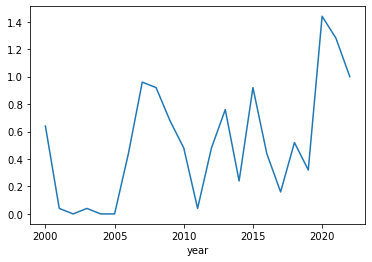

In [72]:
mean_l = df_largest.groupby('year').ratio_percent.mean()
mean_l.plot(kind='line')

<AxesSubplot:xlabel='ind_index'>

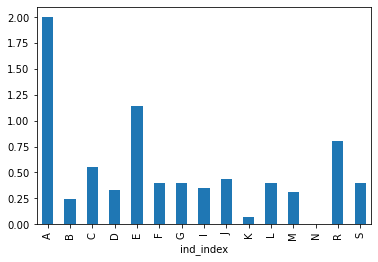

In [71]:
ind_l = df_largest.groupby(['ind_index']).ratio_percent.mean()
ind_l.plot(kind='bar')

In [63]:
# top 10 decrease
df_smallest = df_all.groupby('year').change.nsmallest(10)
df_smallest = pd.DataFrame(df_smallest)
df_smallest.reset_index(inplace=True)
df_smallest.columns = ['year','row','change']
df_smallest = pd.merge(df_smallest,df_all,on=['change','year'],how='left')
df_smallest = pd.DataFrame(df_smallest,columns=['year','stk','change','count_up'])
df_smallest = pd.merge(df_smallest,df_ind,on='stk',how='left')
df_smallest = pd.merge(df_smallest,ind,on='ind_index',how='left')
df_smallest['ratio_percent'] = df_smallest['count_up']/250*100
df_smallest = pd.DataFrame(df_smallest,columns=['year','stk','change','count_up','ind_index','ind_name','ratio_percent'])
df_smallest

,year,stk,change,count_up,ind_index,ind_name,ratio_percent
0,2000,48,-0.509154,0,C,制造业,0.0
1,2000,730,-0.454979,0,E,建筑业,0.0
2,2000,600157,-0.452614,1,D,电力、热力、燃气及水生产和供应业,0.4
3,2000,58,-0.374643,0,L,租赁和商务服务业,0.0
4,2000,600152,-0.369221,1,C,制造业,0.4
...,...,...,...,...,...,...,...
225,2022,600695,-0.904851,0,J,金融业,0.0
226,2022,2447,-0.904523,0,I,信息传输、软件和信息技术服务业,0.0
227,2022,300312,-0.902597,0,I,信息传输、软件和信息技术服务业,0.0
228,2022,502,-0.902156,0,K,房地产业,0.0


<AxesSubplot:xlabel='year'>

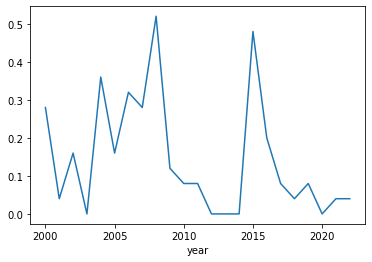

In [73]:
mean_s = df_smallest.groupby('year').ratio_percent.mean()
mean_s.plot(kind='line')

<AxesSubplot:xlabel='ind_index'>

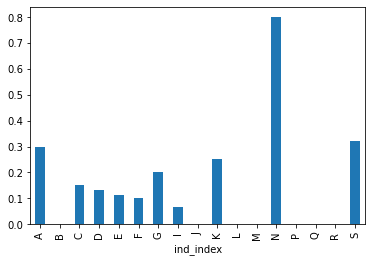

In [74]:
ind_s = df_smallest.groupby(['ind_index']).ratio_percent.mean()
ind_s.plot(kind='bar')